# Dominant-Image-Colours-K-Means
This notebook shows how to use k-means clustering to find the dominant colours in an image and represent the image as these dominat colours only. <br> 
Inspired by https://github.com/ZeevG/python-dominant-image-colour.

In [1]:
import numpy as np
from PIL import Image

Load the image

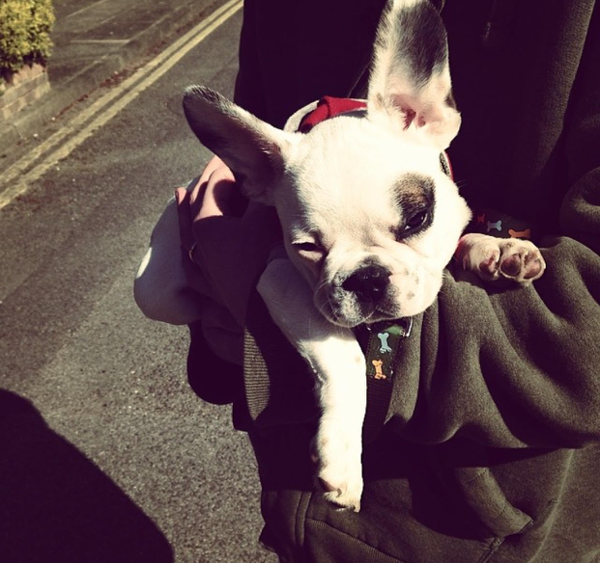

In [184]:
img = Image.open("./img/puppy.jpg")
# reduce the size of the image
img.thumbnail((600, 600))
display(img)

Define the number of clusters (k) and the number of iterations to run k-means

In [185]:
k = 5
iterations = 10

Get the initial cluster centres by selecting random pixels in the image

In [186]:
# change image array from 3d to 2d
img_np = np.array(img.getdata(), dtype = np.uint8) 
np.random.seed(98765)
centres = img_np[np.random.randint(img_np.shape[0], size = k),:]

### Apply k-means to find dominant pixel colours

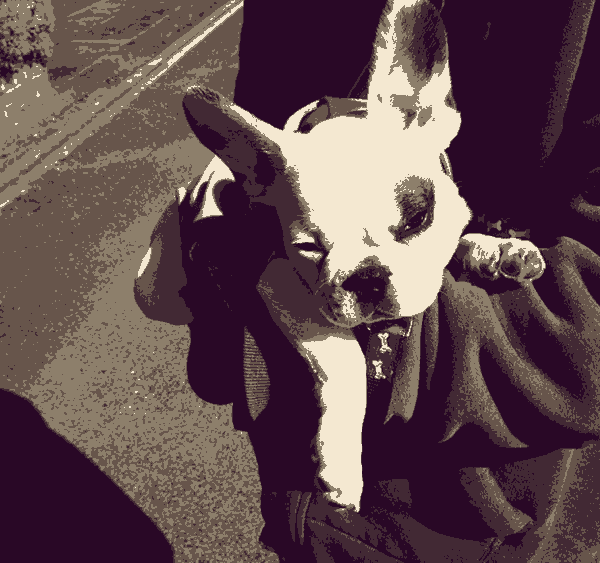

In [187]:
for j in range(iterations):
    
    # empty array to hold distances from centres to pixels
    distances = np.empty([img_np.shape[0], k])
    
    # loop through each cluster and calculate the distance from the centre to each pixel 
    for i in range(k):
        distances[:,i] = distance_to_centre(img_np, centres[i])
        
    # find the closest cluster (centre) to each pixel
    clusters = np.argmin(distances, axis = 1)

    #centres = np.empty([k, 3])
    
    # loop through each cluster and calculate the mean RGB values
    # these values become to new cluster centres
    for i in range(k):
        centres[i,:] = np.mean(img_np[clusters == i,:], axis = 0)

    img_clustered = np.empty([img_np.shape[0], 3])
    
    # create a new image which contains the colour blocks for each cluster
    for i in range(k):
        img_clustered[clusters == i] = centres[i]
        
    # convert array to image object 
    w, h = img.size
    img_clustered = np.asarray(img_clustered).astype('uint8').reshape((h, w, 3))   
    img_clustered = Image.fromarray(img_clustered)

# show the final clustered imaged
display(img_clustered)    